# 네이버 실시간 검색어 순위 크롤링

### 1)라이브러리 import 모든 크롤링에 기본적으로 사용되는 것들

In [1]:
import requests
from bs4 import BeautifulSoup

***
### 2)requests 모듈의 get()함수를 사용해 크롤링할 웹사이트에서 html 문서를 읽어온다
#### 파싱을 할 페이지를 요청하는 과정으로 requests의 get을 사용하고 소괄호안에 주소를 입력한다. 마지막에 /를 사용해준다

#### print를 통해 request를 출력해본다
#### 여기서 코드200이 나온다면 정상

In [3]:
#파싱할 페이지를 요청
request = requests.get('http://www.naver.com/')
#print(request) #<Response [200]> => 정상접속

#페이지 정보중 html 코드만 얻어온다.
html = request.text

#### 페이지 요청이 성공했다면 부러온 사이트에ㅓ text(문자만) 불러온다.
#### 불러온 페이지의 함수를 .text를 사용해 코드만 얻어온다.(tag제외)

***
### 3)BeautifulSoup의 모듈의 BeautifulSoup()함수 사용해서 파싱할 준비 
#### 얻어온 html코드를 파싱하기위해 beautifulsoup 객체로 변환
#### beautifulsoup()함수를 사용해 파싱할 준비가 된 객체에서 필요한 데이터만 얻어온다.

In [4]:
soup = BeautifulSoup(html,'html.parser')

#### 위와 같이 쓰고 print로 출력을 해보면 엄청나게 많고 이상한 글씨들이 막 나온다

In [5]:
print(soup)

<!DOCTYPE doctype html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="origin" name="Referrer"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1100" name="viewport"/>
<meta content="NAVER" name="apple-mobile-web-app-title">
<meta content="index,nofollow" name="robots">
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
<meta content="네이버" property="og:title"/>
<meta content="https://www.naver.com/" property="og:url"/>
<meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
<meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
<meta content="summary" name="twitter:card"/>
<meta content="" name="twitter:title"/>
<meta content="https://www.naver.com/" name="twitter:url"/>
<meta content="https://s.pstatic.net/static/www/

#### 원하는 정보만 긁어오기
```
함수이름 = soup.findAll('태그이름',{속성이름':'속성값'})
```

***
### 4)네이버 실시간 검색어 정보 긁어오기
#### 네이버 메인창에 들어가 F12 Elements 왼쪽 마우스 커서모양 클릭
#### 원하는 정보를 클릭하면 그 칸에 대한 코딩정보 나온다.
#### 필요한 정보 : 태그이름, 속성이름, 속성값
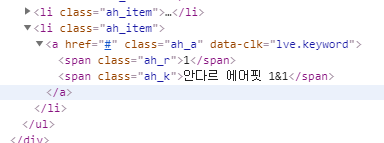
#### 결과 : 태그이름 = span, 속성이름 = class, 속성값 = ah_k

In [8]:
soup = BeautifulSoup(html,'html.parser')
words = soup.findAll('span',{'class':'ah_k'})

In [9]:
print(words)

[<span class="ah_k">ok캐쉬백이천만원퀴즈</span>, <span class="ah_k">조국 딸</span>, <span class="ah_k">착한구두 100원</span>, <span class="ah_k">김성환</span>, <span class="ah_k">남진나이</span>, <span class="ah_k">남진</span>, <span class="ah_k">오케이캐쉬백천만원이벤트</span>, <span class="ah_k">곽지영</span>, <span class="ah_k">김원중</span>, <span class="ah_k">안국약품</span>, <span class="ah_k">네이비즘</span>, <span class="ah_k">경성대 수강신청</span>, <span class="ah_k">코레일</span>, <span class="ah_k">동상이몽 시즌2 - 너는 내 운명</span>, <span class="ah_k">갤럭시노트10 공시지원금</span>, <span class="ah_k">안다르</span>, <span class="ah_k">마니커에프앤지</span>, <span class="ah_k">맨유 울버햄튼</span>, <span class="ah_k">2019 추석 기차표</span>, <span class="ah_k">대구대학교</span>, <span class="ah_k">ok캐쉬백이천만원퀴즈</span>, <span class="ah_k">조국 딸</span>, <span class="ah_k">착한구두 100원</span>, <span class="ah_k">김성환</span>, <span class="ah_k">남진나이</span>, <span class="ah_k">남진</span>, <span class="ah_k">오케이캐쉬백천만원이벤트</span>, <span class="ah_k">곽지영</span>, <span class="ah_k">김원중</span>, <s

#### 실시간 검색어들을 불러왔다 이제 출력하는 방법만 하면 된다

***
### 5)파싱한 결과 출력하기
#### 이제 제어문을 통해 출력한다
#### 정보가 바뀔때마다 시간을 알기 위해 datetime 함수를 불러와서 같이사용

In [17]:
from datetime import datetime as dt
now = dt.now()
print("{}현재 NAVER 실시간 검색어 TOP 20".format(now))
for i in range(20): #다출력하면 20개짜리가 2개 반복
    print('{0:2d}위 => {1}'.format(i+1, words[i].text))
    #2d는 오른쪽 정렬인듯?

2019-08-20 10:43:59.301535현재 NAVER 실시간 검색어 TOP 20
 1위 => ok캐쉬백이천만원퀴즈
 2위 => 조국 딸
 3위 => 착한구두 100원
 4위 => 김성환
 5위 => 남진나이
 6위 => 남진
 7위 => 오케이캐쉬백천만원이벤트
 8위 => 곽지영
 9위 => 김원중
10위 => 안국약품
11위 => 네이비즘
12위 => 경성대 수강신청
13위 => 코레일
14위 => 동상이몽 시즌2 - 너는 내 운명
15위 => 갤럭시노트10 공시지원금
16위 => 안다르
17위 => 마니커에프앤지
18위 => 맨유 울버햄튼
19위 => 2019 추석 기차표
20위 => 대구대학교
